In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
df=pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')

In [27]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [3]:
df=df.dropna()

In [4]:
df=df.sample(50000,random_state=1)

In [8]:
df.to_csv('questions.csv')

is_duplicate
0    31522
1    18478
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

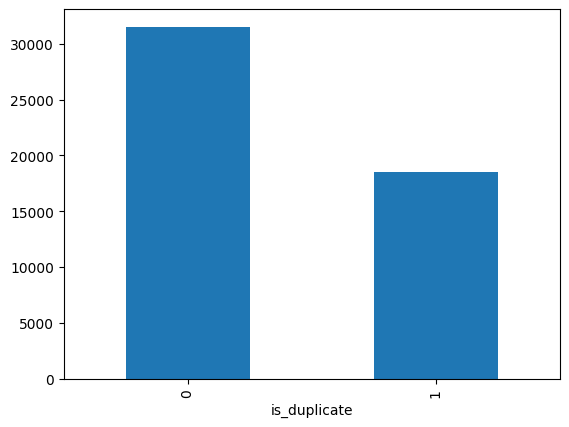

In [30]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

# BaseModel

In [31]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
questions = list(df['question1']) + list(df['question2'])
vectorizer = TfidfVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [33]:
print(q1_arr.shape,q2_arr.shape)

(50000, 4000) (50000, 4000)


In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= df.index)
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 8000)

In [35]:
temp_df['is_duplicate'] = df['is_duplicate']

In [36]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,is_duplicate
96073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
280720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.304544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
96480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
166506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
128778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
330159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
31565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
299639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7399

# Model2 with feature engineering

In [39]:
new_df=df.copy()

In [40]:
df

,id,qid1,qid2,question1,question2,is_duplicate
96073,96073,190707,190708,"Today one lady told me ""are you stalking me?"" ...",What should I do if a former employer is stalk...,0
280720,280720,551845,551846,What is the embarrassing of your life?,What are the embarrassing moment of your life?,1
96480,96480,191509,191510,How much does it cost to write a white paper?,How much does it cost to make a white paper?,1
166506,166506,329095,329096,Can you really see who viewed your pics or pro...,Is there a way to see who viewed my Instagram ...,1
128778,128778,255099,255100,What bands would you suggest to a die hard Rad...,"Radiohead (band): What does the ending of ""Jus...",0
...,...,...,...,...,...,...
24192,24192,48264,48265,"Why was Israel given to the Jews, and where di...",I just love Israel and Jews for their patrioti...,0
330159,330159,647464,647465,Does Hinduism believe in evolution?,Does Hinduism believe in theory of evolution?,1
31565,31565,62922,62923,How can I improve my English in all aspects?,How do I speak English like celebrities?,1
299639,299639,588521,588522,What is compression ratio in engine?,What is the compression ratio of an engine?,0


In [41]:
new_df["len_q1"]=new_df['question1'].str.len()
new_df["len_q2"]=new_df['question2'].str.len()



In [42]:
new_df['num_words_q1']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['num_words_q2']=new_df['question2'].apply(lambda row: len(row.split(" ")))

In [43]:
def words_common(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len( w1 & w2)

In [44]:
new_df['common_words']=new_df.apply(words_common,axis=1)

In [45]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
    

In [46]:
new_df['word_total'] = new_df.apply(total_words, axis=1)


In [47]:
new_df['word_share'] = round(new_df['common_words']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,num_words_q1,num_words_q2,common_words,word_total,word_share
96073,96073,190707,190708,"Today one lady told me ""are you stalking me?"" ...",What should I do if a former employer is stalk...,0,75,53,14,11,2,25,0.08
280720,280720,551845,551846,What is the embarrassing of your life?,What are the embarrassing moment of your life?,1,38,46,7,8,6,15,0.40
96480,96480,191509,191510,How much does it cost to write a white paper?,How much does it cost to make a white paper?,1,45,44,10,10,9,20,0.45
166506,166506,329095,329096,Can you really see who viewed your pics or pro...,Is there a way to see who viewed my Instagram ...,1,64,51,12,11,3,23,0.13
128778,128778,255099,255100,What bands would you suggest to a die hard Rad...,"Radiohead (band): What does the ending of ""Jus...",0,111,60,21,10,2,29,0.07


minimum characters 1
maximum characters 345
average num of characters 59


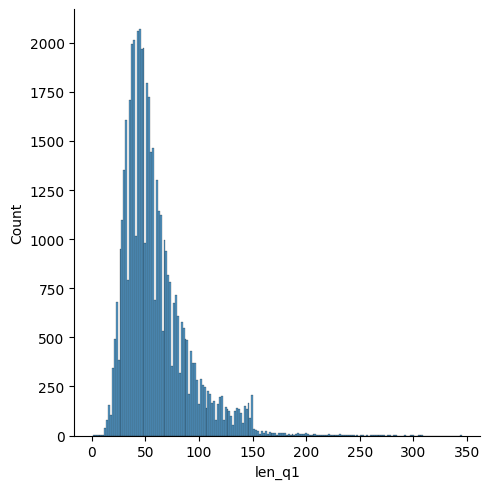

In [48]:
import seaborn as sns
sns.displot(new_df['len_q1'])
print('minimum characters',new_df['len_q1'].min())
print('maximum characters',new_df['len_q1'].max())
print('average num of characters',int(new_df['len_q1'].mean()))

minimum characters 4
maximum characters 1151
average num of characters 60


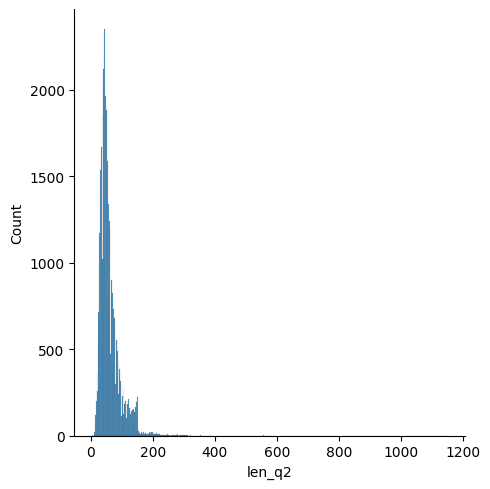

In [49]:
sns.displot(new_df['len_q2'])
print('minimum characters',new_df['len_q2'].min())
print('maximum characters',new_df['len_q2'].max())
print('average num of characters',int(new_df['len_q2'].mean()))

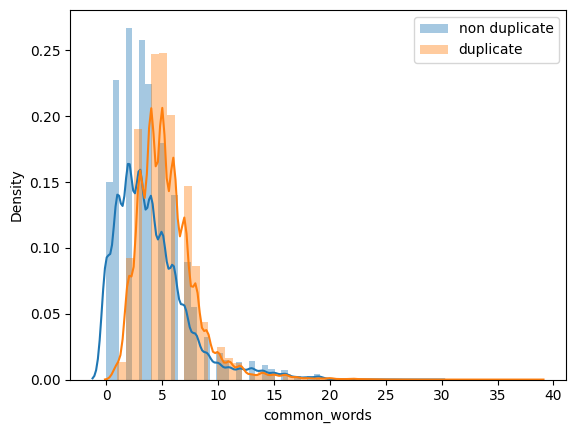

In [50]:
import matplotlib.pyplot as plt
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

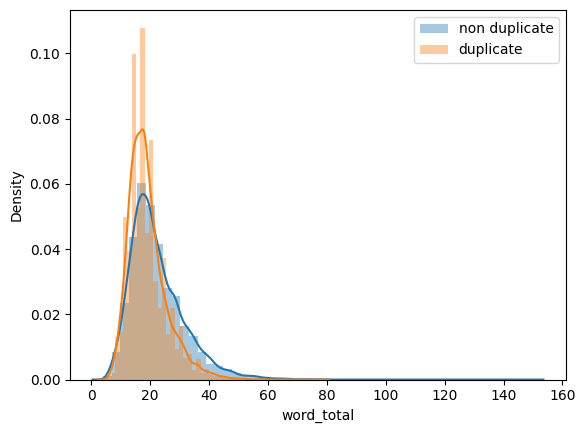

In [51]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

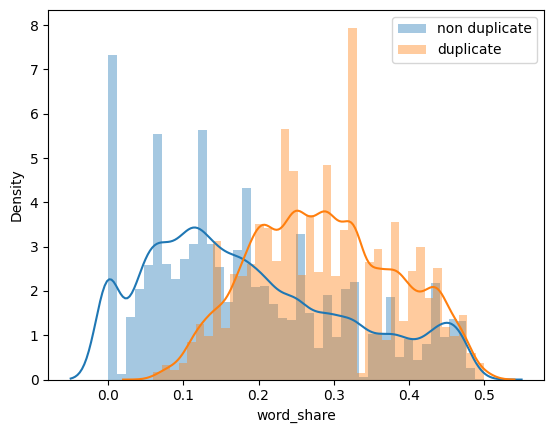

In [52]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [53]:
#seperating the question columns to apply tfidf
questions_df=new_df[['question1','question2']]
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape,questions_df.shape)
final_df.head()

(50000, 8) (50000, 2)


,is_duplicate,len_q1,len_q2,num_words_q1,num_words_q2,common_words,word_total,word_share
96073,0,75,53,14,11,2,25,0.08
280720,1,38,46,7,8,6,15,0.40
96480,1,45,44,10,10,9,20,0.45
166506,1,64,51,12,11,3,23,0.13
128778,0,111,60,21,10,2,29,0.07


In [54]:
questions = list(questions_df['question1']) + list(questions_df['question2'])
vectorizer = TfidfVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [55]:
q1_arr.shape

(50000, 4000)

In [56]:
temp_df1 = pd.DataFrame(q1_arr, index= df.index)
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 8000)

In [57]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)


(50000, 8008)


In [58]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [59]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7676

In [60]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7658

# Final model


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [7]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents 
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    

    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [8]:
new_df=df.copy()

In [9]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [10]:
new_df["len_q1"]=new_df['question1'].str.len()
new_df["len_q2"]=new_df['question2'].str.len()

In [11]:
new_df['num_words_q1'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['num_words_q2'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [12]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

new_df['common_words'] = new_df.apply(common_words, axis=1)


In [13]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words, axis=1)


In [14]:
new_df['word_share'] = round(new_df['common_words']/new_df['word_total'],2)


In [15]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,num_words_q1,num_words_q2,common_words,word_total,word_share
96073,96073,190707,190708,today one lady told me are you stalking me ...,what should i do if a former employer is stalk...,0,74,52,17,11,3,25,0.12
280720,280720,551845,551846,what is the embarrassing of your life,what are the embarrassing moment of your life,1,37,45,7,8,6,15,0.40
96480,96480,191509,191510,how much does it cost to write a white paper,how much does it cost to make a white paper,1,44,43,10,10,9,20,0.45
166506,166506,329095,329096,can you really see who viewed your pics or pro...,is there a way to see who viewed my instagram ...,1,63,50,12,11,4,23,0.17
128778,128778,255099,255100,what bands would you suggest to a die hard rad...,radiohead band what does the ending of jus...,0,110,59,21,15,2,29,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24192,24192,48264,48265,why was israel given to the jews and where di...,i just love israel and jews for their patrioti...,0,81,142,16,28,5,39,0.13
330159,330159,647464,647465,does hinduism believe in evolution,does hinduism believe in theory of evolution,1,34,44,5,7,5,12,0.42
31565,31565,62922,62923,how can i improve my english in all aspects,how do i speak english like celebrities,1,43,39,9,7,3,16,0.19
299639,299639,588521,588522,what is compression ratio in engine,what is the compression ratio of an engine,0,35,42,6,8,5,14,0.36


In [16]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [17]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
def lcsubstrings(s1, s2):
    """
    Finds the longest common substrings between two strings.
    """
    if not s1 or not s2:
        return []
    
    m = [[0] * (1 + len(s2)) for _ in range(1 + len(s1))]
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    return [s1[x_longest - longest: x_longest]]

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [19]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [20]:
questions_df = new_df[['question1','question2']]
questions_df.head()

,question1,question2
96073,today one lady told me are you stalking me ...,what should i do if a former employer is stalk...
280720,what is the embarrassing of your life,what are the embarrassing moment of your life
96480,how much does it cost to write a white paper,how much does it cost to make a white paper
166506,can you really see who viewed your pics or pro...,is there a way to see who viewed my instagram ...
128778,what bands would you suggest to a die hard rad...,radiohead band what does the ending of jus...


In [21]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 19)


,is_duplicate,len_q1,len_q2,num_words_q1,num_words_q2,common_words,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
96073,0,74,52,17,11,3,25,0.12,0.333322,0.142855,0.333328,0.249997,0.272725,0.214284,0,0,3,12.5,0.226415
280720,1,37,45,7,8,6,15,0.40,0.999950,0.666644,0.799984,0.799984,0.857131,0.749991,1,1,1,7.5,0.473684
96480,1,44,43,10,10,9,20,0.45,0.799984,0.799984,0.999980,0.999980,0.899991,0.899991,1,1,0,10.0,0.568182
166506,1,63,50,12,11,4,23,0.17,0.599988,0.499992,0.166664,0.166664,0.363633,0.333331,0,0,1,11.5,0.313725
128778,0,110,59,21,15,2,29,0.07,0.199996,0.090908,0.199996,0.142855,0.199998,0.095238,0,0,11,15.5,0.166667


In [22]:
 from sklearn.feature_extraction.text import TfidfVectorizer
questions = list(questions_df['question1']) + list(questions_df['question2'])
vectorizer = TfidfVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [23]:
temp_df1 = pd.DataFrame(q1_arr, index= questions_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= questions_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 8000)

In [25]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)

(50000, 8019)


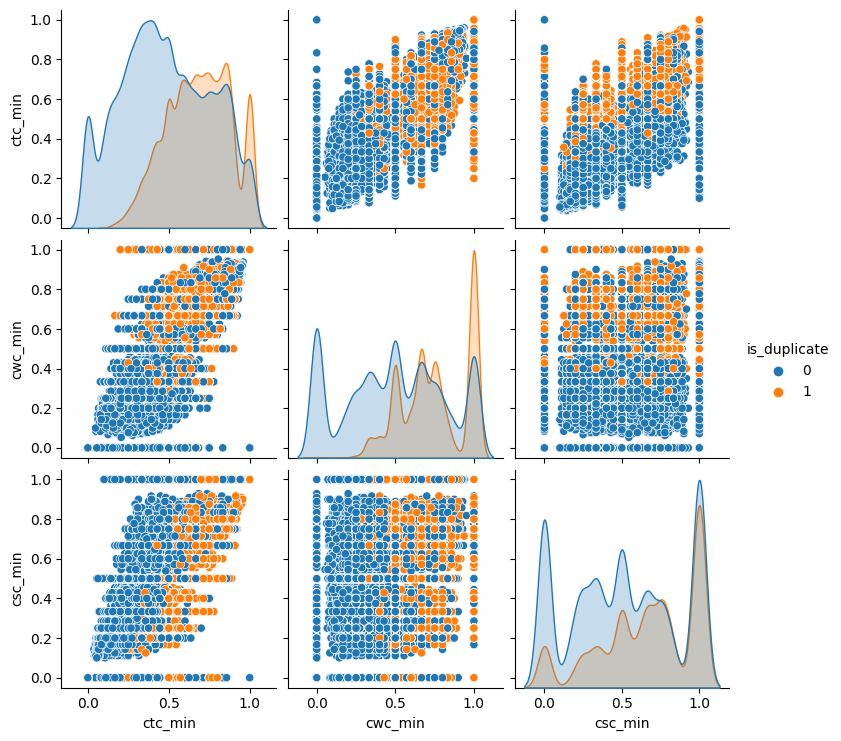

In [80]:
sns.pairplot(final_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


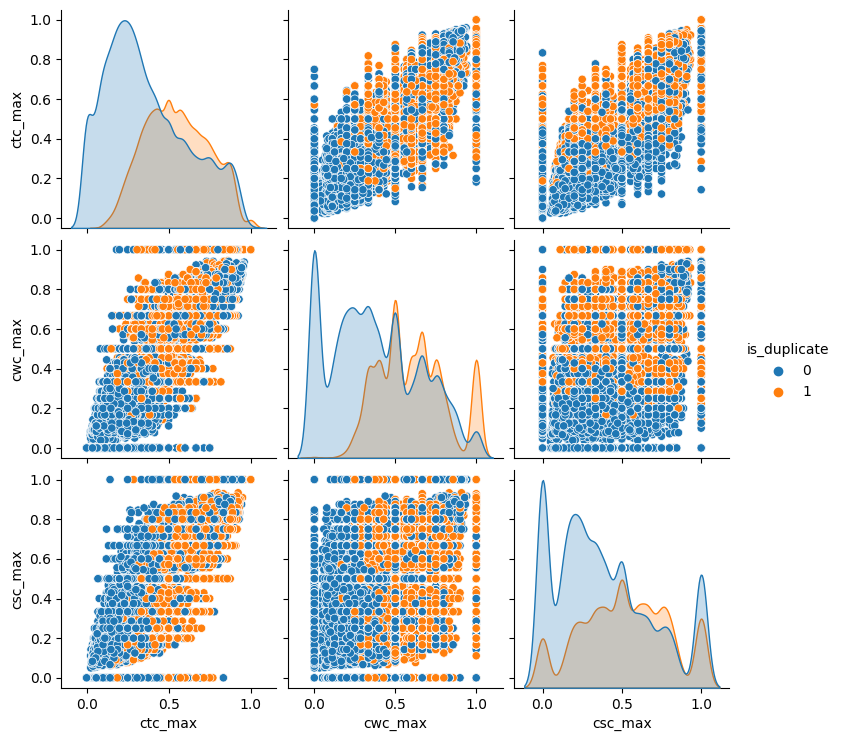

In [81]:
sns.pairplot(final_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


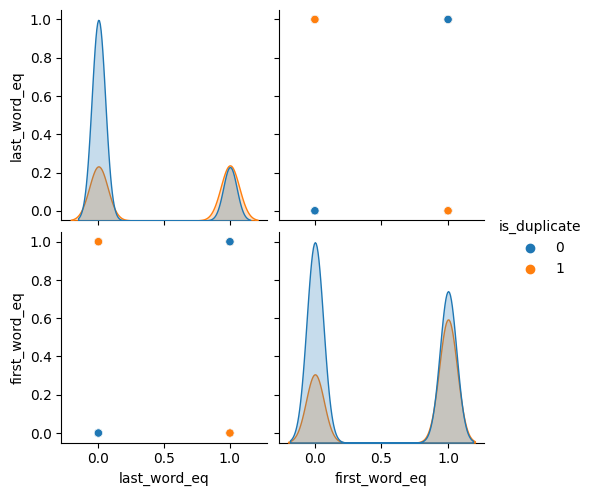

In [82]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


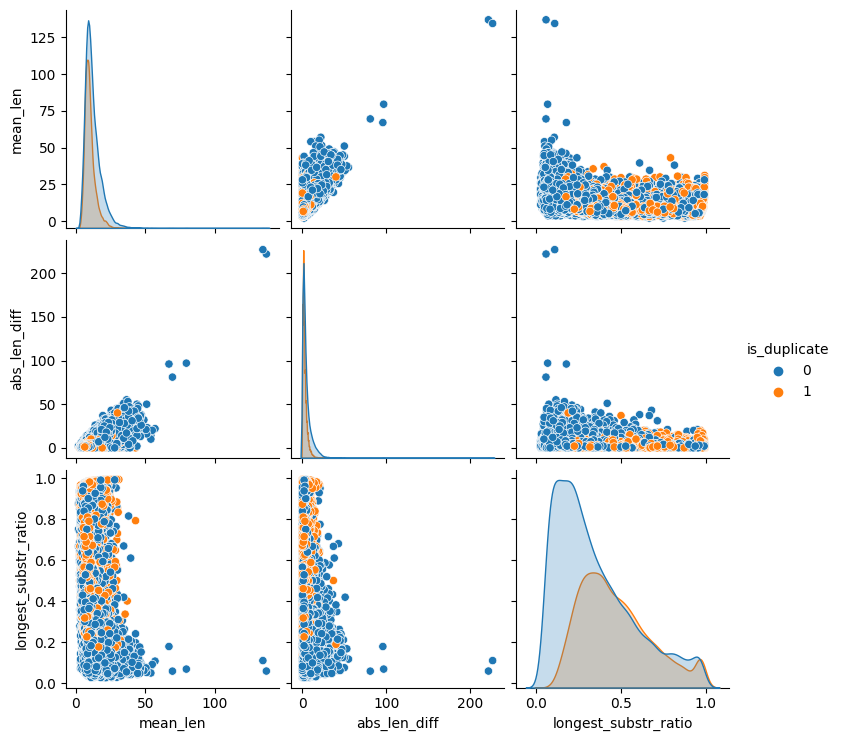

In [83]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7842

In [93]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [45]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [46]:

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [48]:

def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [54]:
def lcsubstrings(s1, s2):
    """
    Finds the longest common substrings between two strings.
    """
    if not s1 or not s2:
        return []
    
    m = [[0] * (1 + len(s2)) for _ in range(1 + len(s1))]
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    return [s1[x_longest - longest: x_longest]]
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [57]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # bow feature for q1
    q1_bow = vectorizer.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = vectorizer.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,18),q1_bow,q2_bow))

In [1]:
pip list


Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
accelerate                               0.28.0
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.12.1
aiofiles                                 22.1.0
aiohttp                                  3.9.1
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.4.0
alembic                                  1.13.1
altair                                   5.2.0
annotated-types                          0.6.0
annoy                                    1.17.3
anyio                                    4.2.0
apache-beam                          